In [196]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [111]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [112]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


**Categorical**: Survived, Pclass, Sex, Cabin, Embarked  
**Numerical**: Age, Fare (continuous); SibSp, Parch (discrete)  
**Mixed**: Tickets (numerical and alphanumerical); Cabin (Alphanumerical)

In [113]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Cabin & Age** most nan

In [114]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
len(train_df.Name.unique())

891

In [116]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [117]:
# Pivot Pclass and Survived
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [118]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [119]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [120]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [121]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Detected strong correlation between [Pclass=1. Sex=female] and Survived=1  
Thus we shold consider Pcalss and Sex in our model

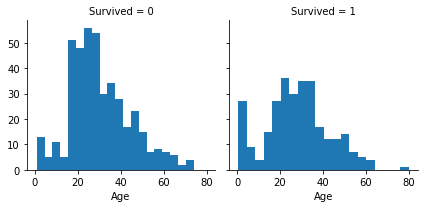

In [122]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Oldest passenger survived, children have highg surviving rate, most young people died  
Thus we should consider Age in our model

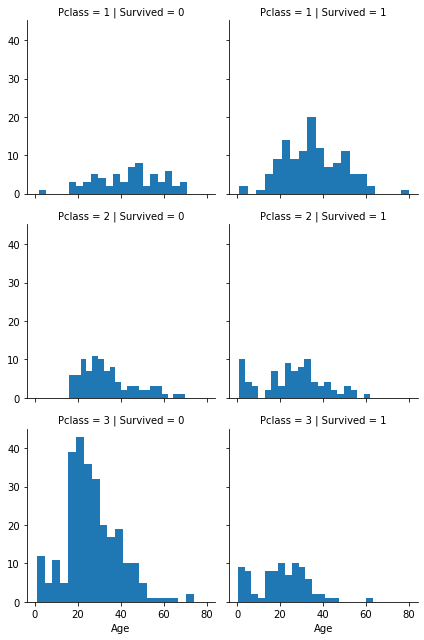

In [123]:
# Combine Pclass and Age features
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

1. Most passengers in Pclass=1 survived, most passengers in Pcalss=3 died
2. Most children survived, whichever class they are in.  
3. The age distribution varies in different class

C:\Users\wangk\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\wangk\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wangk\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


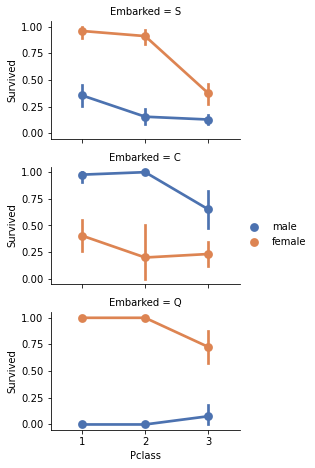

In [124]:
# Correlating categorical features
g = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

Embarked has significant influence, we should add it in the model

C:\Users\wangk\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\wangk\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


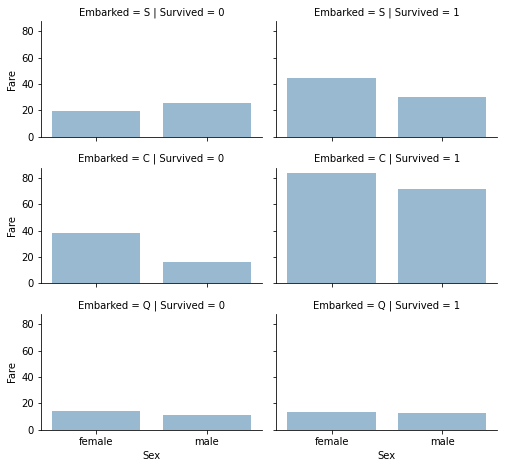

In [125]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()

High fare paying passengers have high survive rate, we should consider this attribute

In [126]:
# Based on the exploration we did, we decide to drop the [Ticket, Cabin] feature
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

The name feature is not relevant with surviving rate, but the **title** is.  
Thus we first extract the **title**, then explore it

In [127]:
# Extract the title using regular expression
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [128]:
# Combine the rare titles
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Certain titles have high surviving rate: Miss, Mrs  
Thus we should add Title to the training model

In [129]:
# Convert the categorical titles to ordinal
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset.Title = dataset.Title.map(title_mapping)
    dataset.Title = dataset.Title.fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [130]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.head(), test_df.head()

(   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0         0       3    male  22.0      1      0   7.2500        S      1
 1         1       1  female  38.0      1      0  71.2833        C      3
 2         1       3  female  26.0      0      0   7.9250        S      2
 3         1       1  female  35.0      1      0  53.1000        S      3
 4         0       3    male  35.0      0      0   8.0500        S      1,
    PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0          892       3    male  34.5      0      0   7.8292        Q      1
 1          893       3  female  47.0      1      0   7.0000        S      3
 2          894       2    male  62.0      0      0   9.6875        Q      1
 3          895       3    male  27.0      0      0   8.6625        S      1
 4          896       3  female  22.0      1      1  12.2875        S      3)

In the next part we convert categorical attributes to numerical values, therefore they can be process by ML models

In [131]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


To complete the 'Age' attribute more reasonably, we calculate the median for each class and gender

In [132]:
# Two genders: [Male, Female]; Three classes: [1, 2, 3]
age_median = np.zeros((2, 3))

# Compute the median for each class and gender
for dataset in combine:
    for i in range(2):
        for j in range(3):
            age_df = dataset[(dataset.Sex == i) & (dataset.Pclass == j+1)]['Age'].dropna()

            age_median[i, j] = age_df.median()

    # Replace the missing age value by median
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = age_median[i, j]

    # Round age to int
    dataset.Age = dataset.Age.astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Complete nan in **Embarked** and convert to numerical value  
We complete the missing value by the most frequent value

In [136]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [137]:
# Fillna
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

# Convert to numerical value
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


Note that there is one missing value in 'Fare' in the test dataset,  
we need to fill it.  
Since there is only one missing value, the model won't be influenced too much by this inserted one.

In [155]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [157]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
 8   Title        418 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 24.6 KB


### Model building and training

In [144]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [145]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\wangk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.93

In [146]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.57

In [147]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

C:\Users\wangk\AppData\Local\Temp/ipykernel_19280/3395592367.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


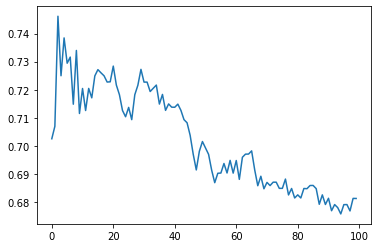

In [201]:
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

a_index=range(100)
a=pd.Series()

for i in a_index:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=i+1), X_train, Y_train, cv=skf)
    a = a.append(pd.Series(np.mean(scores)))

plt.plot(a_index, a)
plt.show()

In [148]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.57

In [149]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.24

In [150]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\wangk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


77.1

In [151]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.4

In [212]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [211]:
d = {'PassengerId': test_df['PassengerId'], 'Survived': Y_pred}
df_evaluation = pd.DataFrame(data=d)
df_evaluation.to_csv('evaluation.csv', sep=',', index=False)

C:\Users\wangk\AppData\Local\Temp/ipykernel_19280/42307530.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


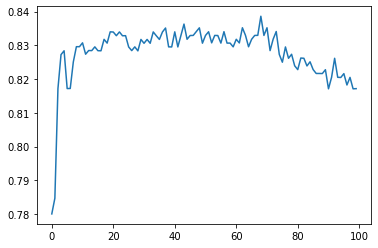

In [208]:
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

a_index=range(100)
a=pd.Series()

for i in a_index:
    scores = cross_val_score(DecisionTreeClassifier(max_leaf_nodes=i+2), X_train, Y_train, cv=skf)
    a = a.append(pd.Series(np.mean(scores)))

plt.plot(a_index, a)
plt.show()

In [195]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

C:\Users\wangk\AppData\Local\Temp/ipykernel_19280/3002641686.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


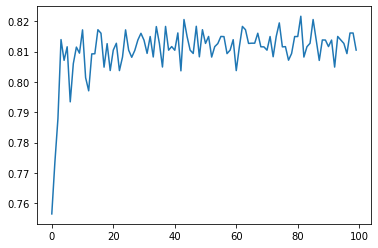

In [198]:
skf = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

a_index=range(100)
a=pd.Series()

for i in a_index:
    scores = cross_val_score(RandomForestClassifier(n_estimators=i+1), X_train, Y_train, cv=skf)
    a = a.append(pd.Series(np.mean(scores)))

plt.plot(a_index, a)
plt.show()

In [168]:
d = {'PassengerId': test_df['PassengerId'], 'Survived': Y_pred}
df_evaluation = pd.DataFrame(data=d)
df_evaluation.to_csv('evaluation.csv', sep=',', index=False)